In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

from class_format_data import FormatData

In [2]:
format_data = FormatData()

# Análise exploratória dos dados de treino

In [3]:
format_data.format_raw_data("train_FD001.txt")

df_train = format_data.get_format_data("train_FD001.txt")

In [4]:
df_train

,unit_number,time,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1.0,1.0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190
1,1.0,2.0,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236
2,1.0,3.0,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442
3,1.0,4.0,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739
4,1.0,5.0,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100.0,196.0,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397.0,2388.0,100.0,38.49,22.9735
20627,100.0,197.0,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395.0,2388.0,100.0,38.30,23.1594
20628,100.0,198.0,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398.0,2388.0,100.0,38.44,22.9333
20629,100.0,199.0,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395.0,2388.0,100.0,38.29,23.0640


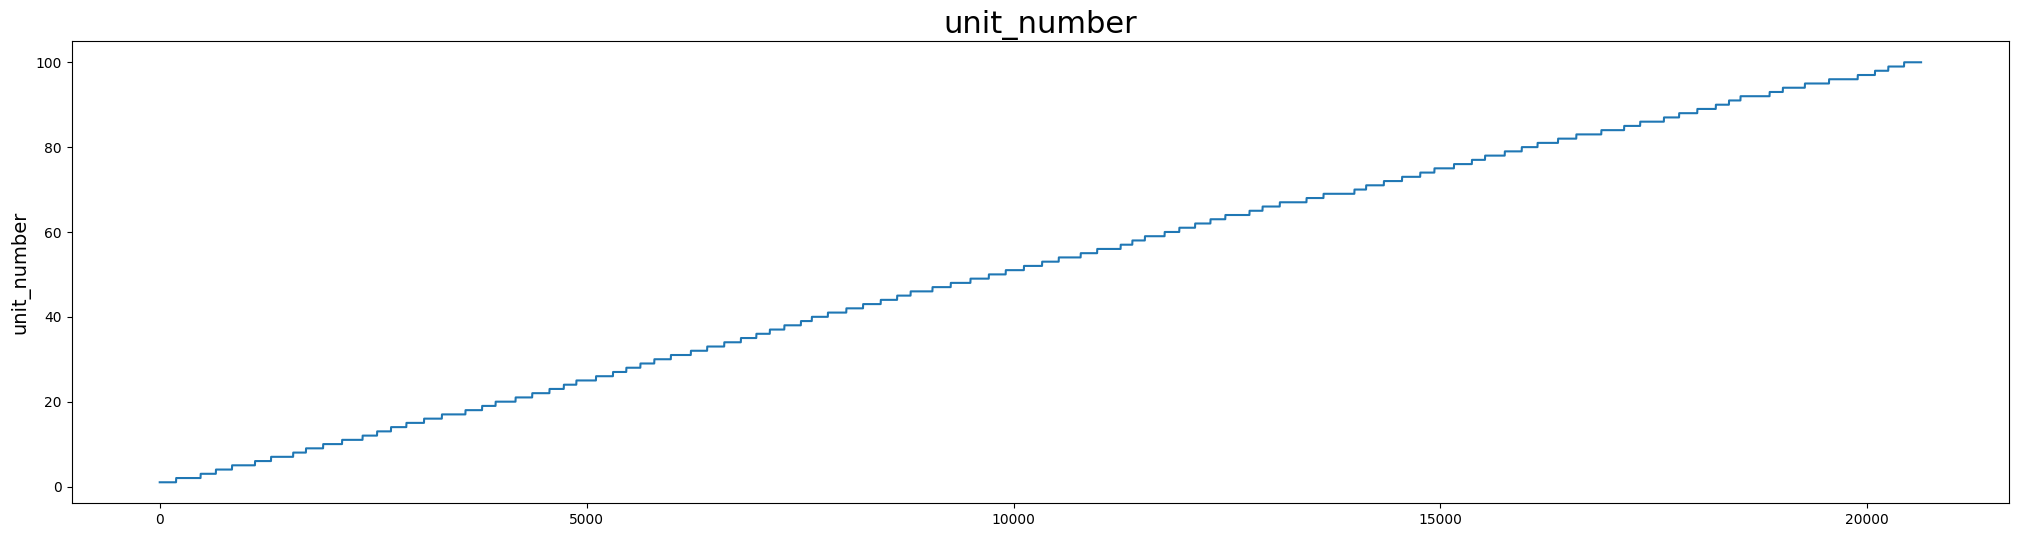

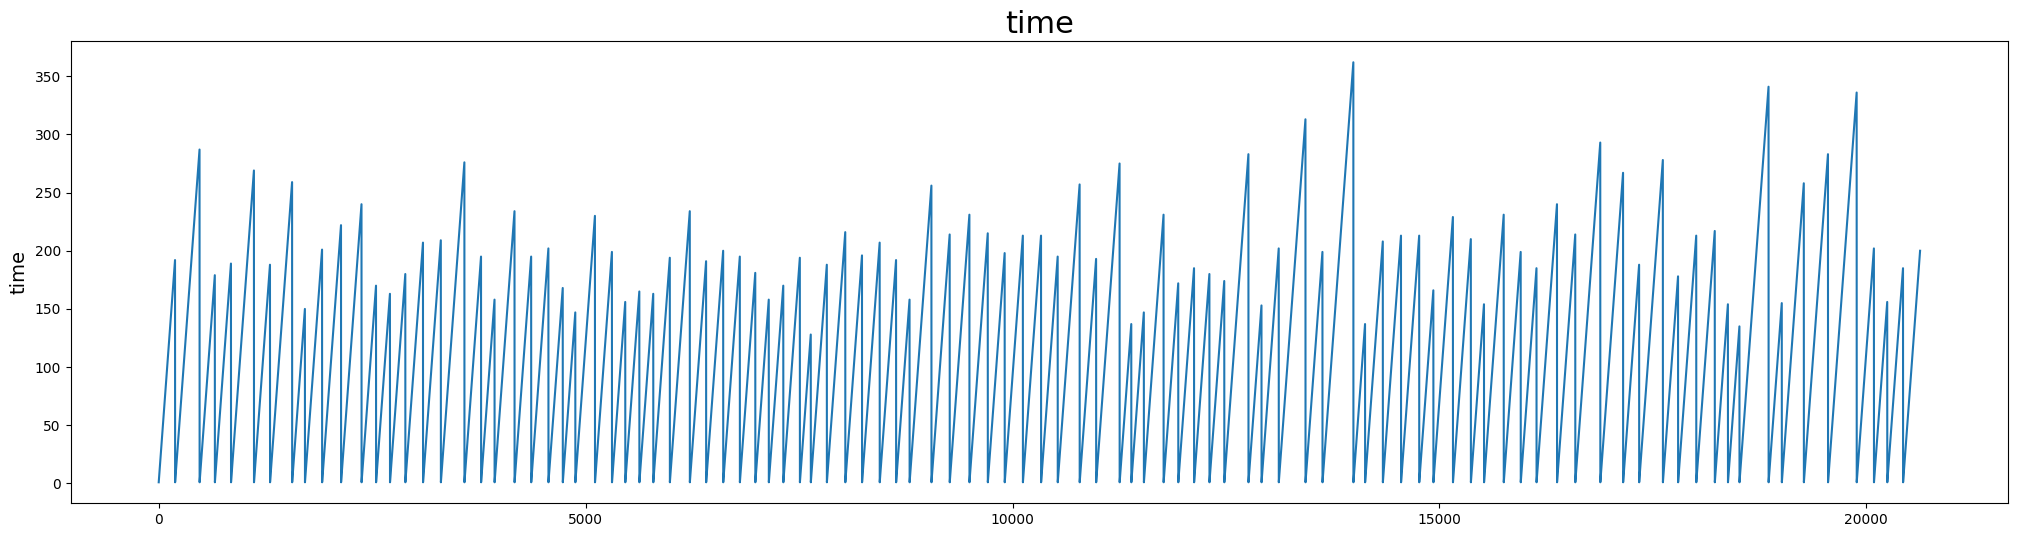

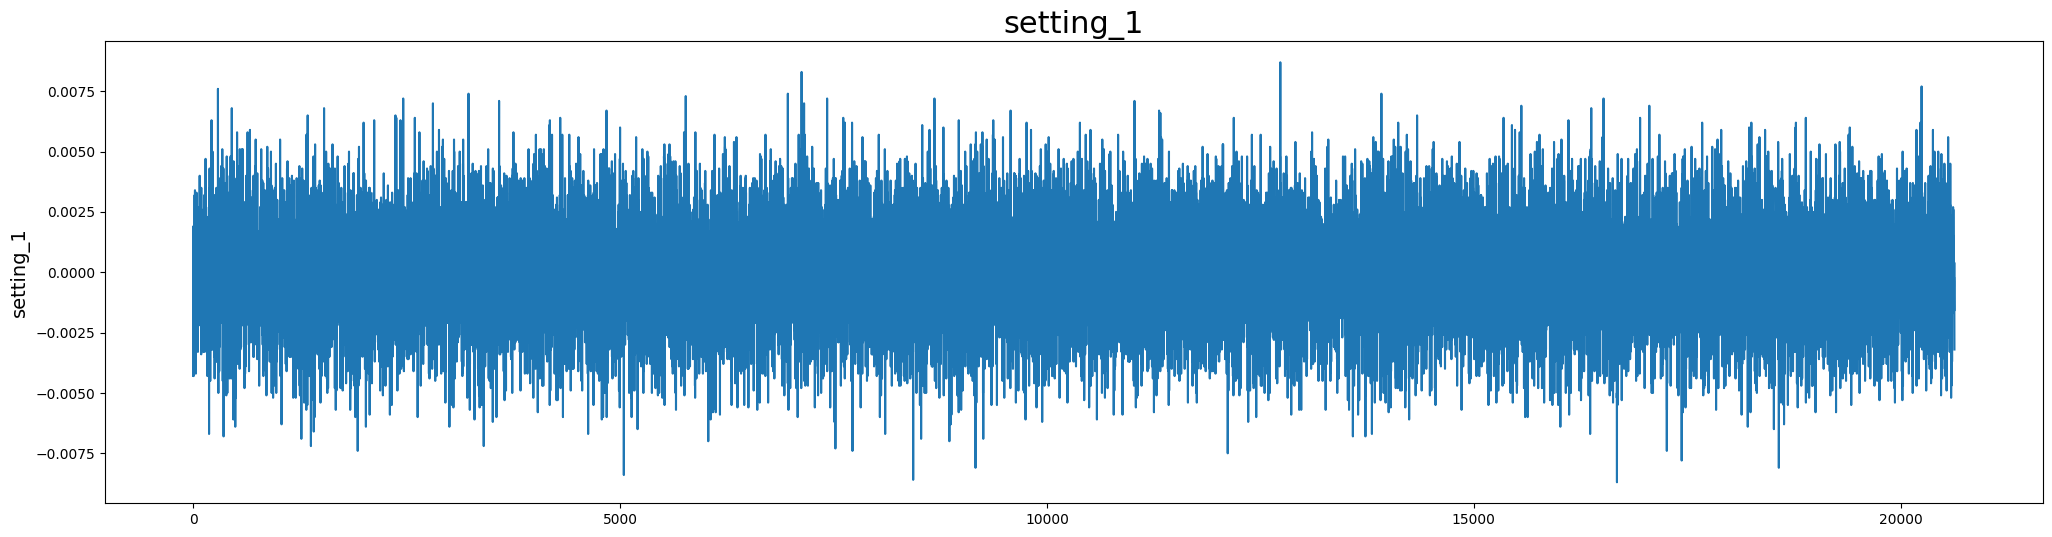

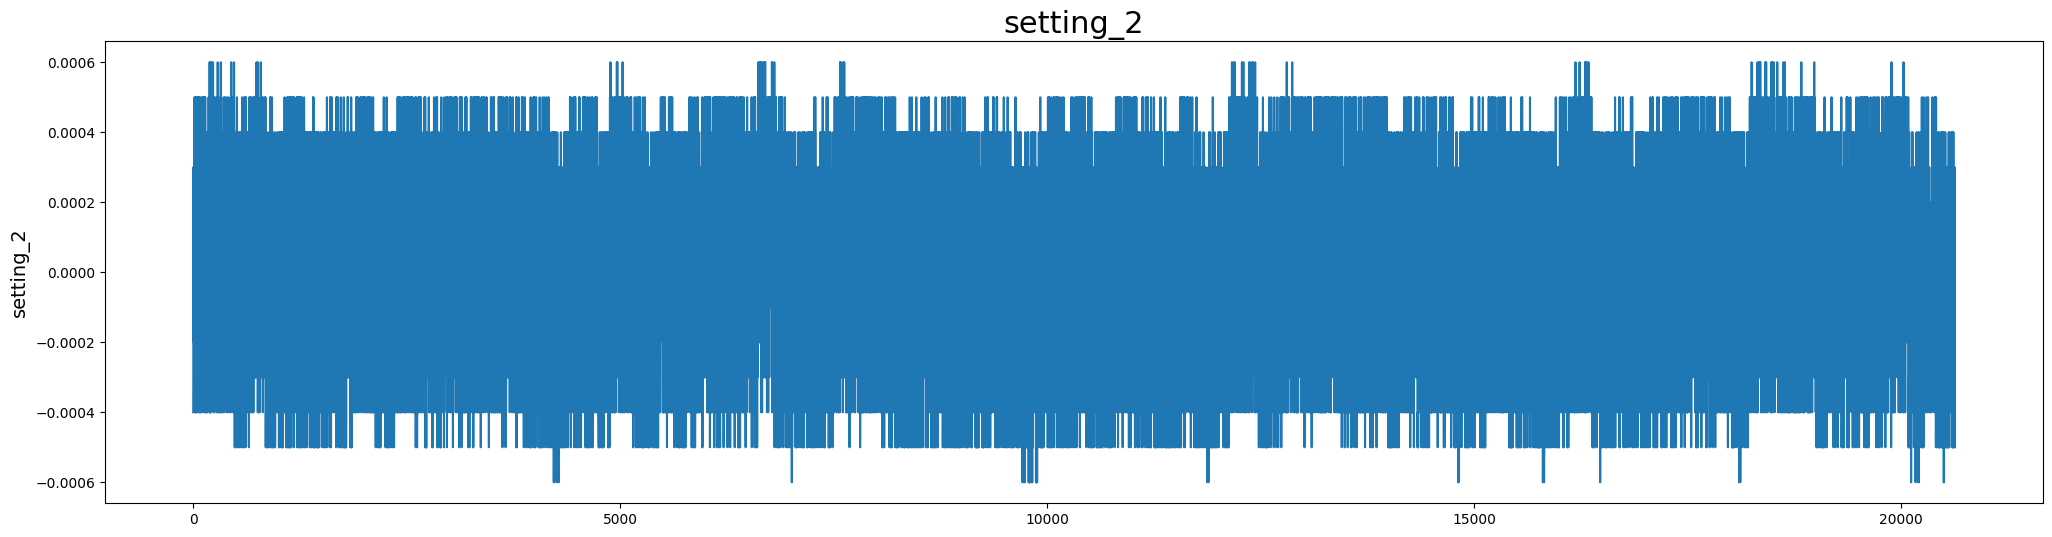

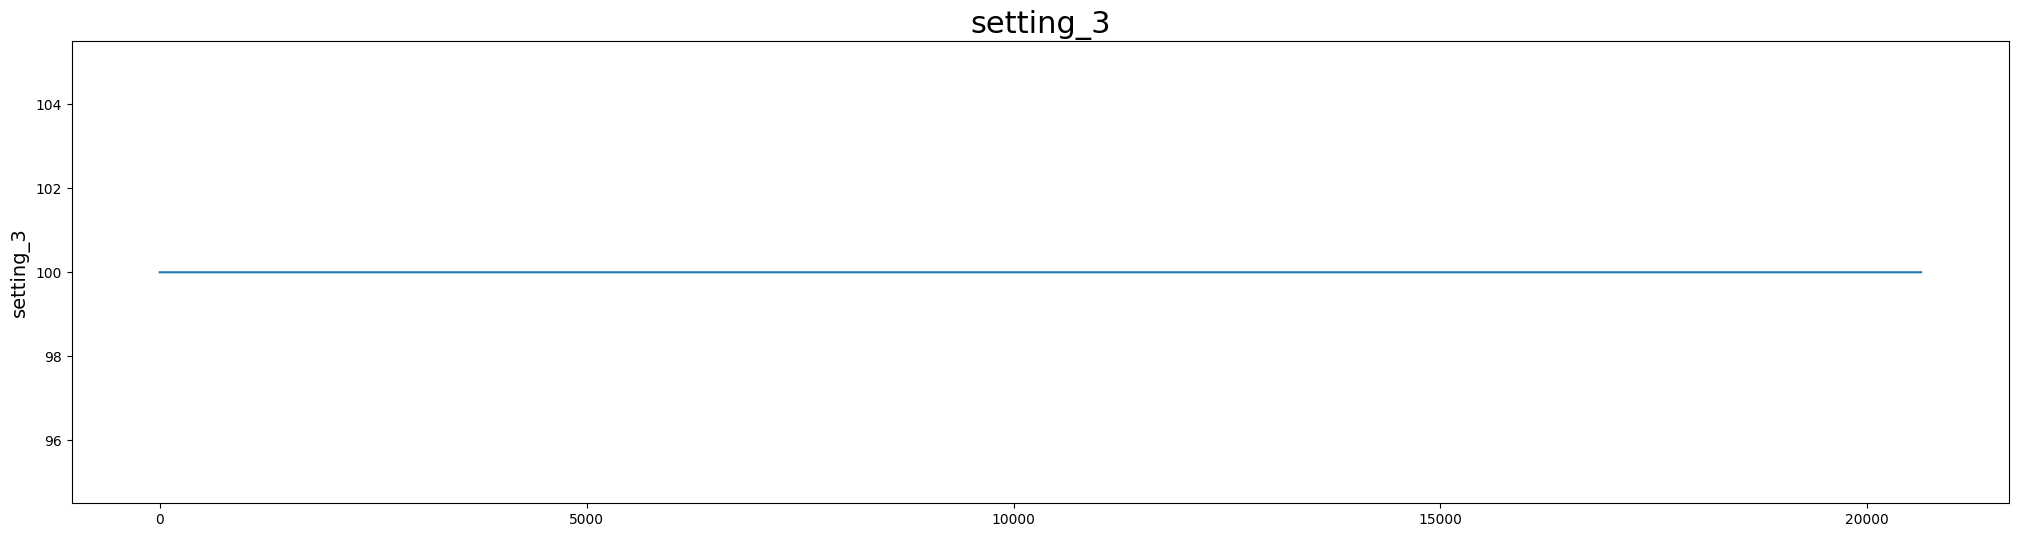

In [5]:
i = 0
for column in df_train.columns:
    fig, ax = plt.subplots(figsize=(25, 6))
    ax.plot(df_train[column])
    ax.set_ylabel(column, fontsize=14)
    ax.set_title(column, fontsize=22)
    i = i + 1
    if i == 5:
        break

Pode-se observar que há sensores que estão flat, ou seja, estão com valor fixo durante todo tempo. Esses sensores deverão ser removidos. Para identifica-los, será usado a variância. Se um sensor tiver uma variância muito pequena, ele será considerado como flat.

In [6]:
df_train["sensor_16"].var()

1.926023300177075e-34

In [7]:
good_sensor = list(df_train.columns)
for sensor in df_train.columns:
    if df_train[sensor].var() <= 0.00000001:
        print("Sensor is flat:", sensor)
        good_sensor.remove(sensor)

Sensor is flat: setting_3
Sensor is flat: sensor_1
Sensor is flat: sensor_5
Sensor is flat: sensor_10
Sensor is flat: sensor_16
Sensor is flat: sensor_18
Sensor is flat: sensor_19


In [8]:
df_train = df_train[good_sensor]
df_train

,unit_number,time,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,1.0,1.0,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190
1,1.0,2.0,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236
2,1.0,3.0,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442
3,1.0,4.0,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739
4,1.0,5.0,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100.0,196.0,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397.0,38.49,22.9735
20627,100.0,197.0,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395.0,38.30,23.1594
20628,100.0,198.0,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398.0,38.44,22.9333
20629,100.0,199.0,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395.0,38.29,23.0640


## Criação da feature RUL (Remaining  Useful  Life)

In [9]:
def add_rul(g):
    g['RUL'] = [max(g['time'])] * len(g)
    #print([max(g['time'])])
    g['RUL'] = g['RUL'] - g['time']
    del g['unit_number']
    return g.reset_index()

In [10]:
df_train_rul = df_train.groupby('unit_number').apply(add_rul).reset_index()
df_train_rul

,unit_number,level_1,index,time,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_6,...,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1.0,0,0,1.0,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,...,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,191.0
1,1.0,1,1,2.0,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,...,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,190.0
2,1.0,2,2,3.0,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,...,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,189.0
3,1.0,3,3,4.0,0.0007,0.0000,642.35,1582.79,1401.87,21.61,...,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,188.0
4,1.0,4,4,5.0,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,...,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100.0,195,20626,196.0,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,...,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397.0,38.49,22.9735,4.0
20627,100.0,196,20627,197.0,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,...,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395.0,38.30,23.1594,3.0
20628,100.0,197,20628,198.0,0.0004,0.0000,643.42,1602.46,1428.18,21.61,...,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398.0,38.44,22.9333,2.0
20629,100.0,198,20629,199.0,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,...,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395.0,38.29,23.0640,1.0


In [11]:
df_train_rul = df_train_rul.drop(columns=["level_1", "index"])
df_train_rul

,unit_number,time,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1.0,1.0,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,191.0
1,1.0,2.0,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,190.0
2,1.0,3.0,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,189.0
3,1.0,4.0,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,188.0
4,1.0,5.0,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100.0,196.0,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397.0,38.49,22.9735,4.0
20627,100.0,197.0,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395.0,38.30,23.1594,3.0
20628,100.0,198.0,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398.0,38.44,22.9333,2.0
20629,100.0,199.0,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395.0,38.29,23.0640,1.0


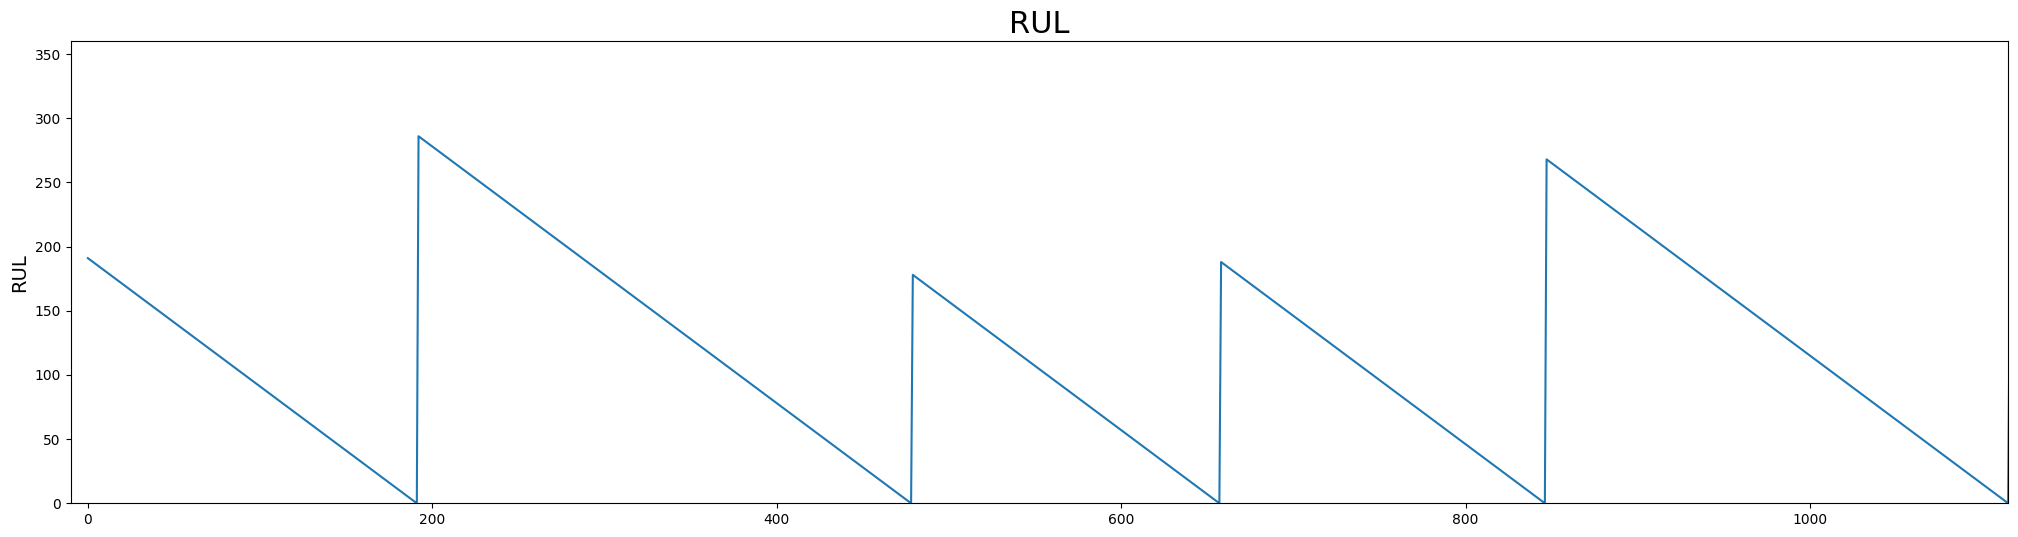

In [12]:
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(df_train_rul.index.values, df_train_rul["RUL"].values)
ax.set_ylabel("RUL", fontsize=14)
ax.set_title("RUL", fontsize=22)
ax.set_xlim(-10,1115)
ax.set_ylim(0,360)
plt.show()

Pode observar que a vida restante do turbofan começa com valor elevado e vai descrescendo ao longo do tempo até chegar igual a zero. Quando inicia um novo ciclo. O que deverá ser feito no processamento para os dados de treino:
- **Remoção dos sensores flat**
- **Cálculo do RUL**